In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline  

In [105]:
df = pd.read_csv('HeartDiseaseData.csv', index_col = 0)
df = df.drop(['ID'], axis=1)
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [70]:
df.dtypes

Age           int64
Sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
num           int64
Place        object
dtype: object

In [71]:
df.describe()

,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [72]:
df.shape

(457, 12)

In [73]:
df.isnull().sum()

Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs         54
restecg      2
thalach     33
exang       33
oldpeak     36
num          0
Place        0
dtype: int64

In [74]:
df_describe = df.describe(include=[object])
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
for c in categorical_columns:
    df[c] = df[c].fillna(df_describe[c]['top'])
df.isnull().sum()

Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs          0
restecg      0
thalach     33
exang        0
oldpeak     36
num          0
Place        0
dtype: int64

In [75]:
df = df.fillna(df.mean())
df.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
Place       0
dtype: int64

In [76]:
df = pd.get_dummies(df)
df.head()

,Age,trestbps,chol,fbs,thalach,oldpeak,num,Sex_female,Sex_male,cp_asymptomatic,...,cp_non-anginal pain,cp_typical angina,restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV,restecg_normal,restecg_showing probable or definite left ventricular hypertrophy by Estes criteria,exang_no,exang_yes,Place_Hungary,Place_Switzerland,Place_VA
1,28,130.0,132.000000,False,185.0,0.0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,29,120.0,243.000000,False,160.0,0.0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,29,140.0,200.048724,False,170.0,0.0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,30,170.0,237.000000,False,170.0,0.0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
5,31,100.0,219.000000,False,150.0,0.0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


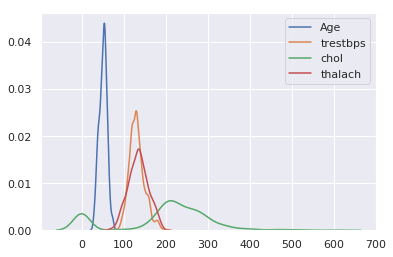

In [80]:
sns.kdeplot(df.Age)
sns.kdeplot(df.trestbps)
sns.kdeplot(df.chol)
sns.kdeplot(df.thalach)

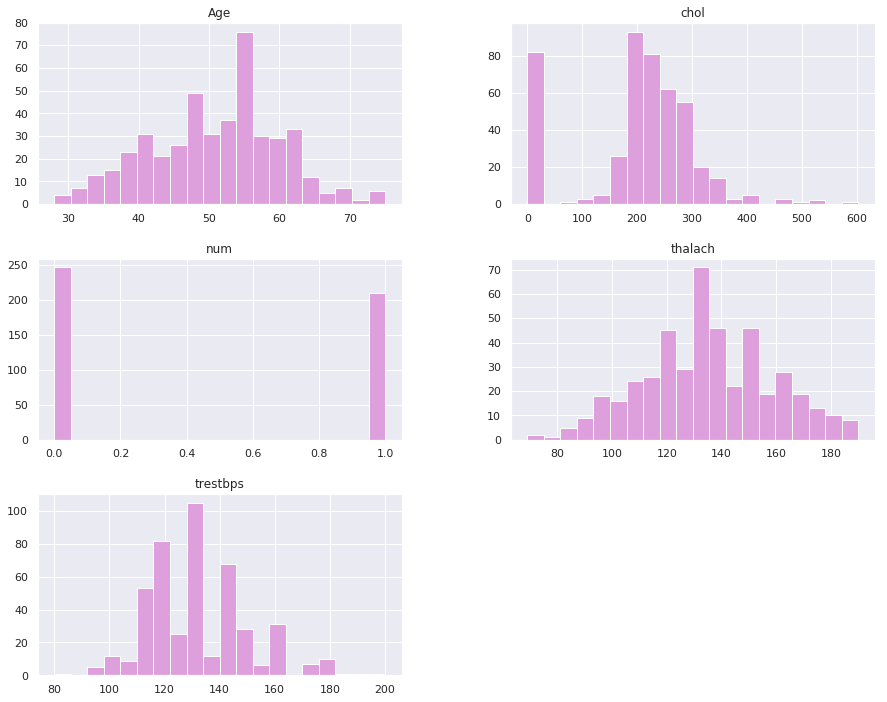

In [81]:
df_selected = df.select_dtypes(include=['int', 'float64']).drop(['oldpeak'], 1)
df_selected.hist(figsize=(15,12),bins = 20, color = '#DDA0DD')
plt.title("Features Distribution")
plt.show()

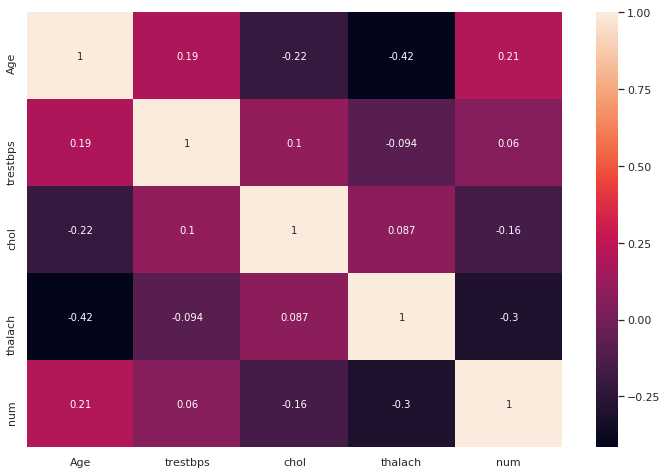

In [82]:
plt.subplots(figsize=(12,8))
sns.heatmap(df_selected.corr(),robust=True,annot=True)

In [83]:
X = df.drop('num', axis=1)
y = df.num

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [95]:
clf = DecisionTreeClassifier(criterion='entropy')
parameters={'min_samples_split': range(2,10),'max_depth': range(1,10), 'min_samples_leaf': range(1,10)}
search = GridSearchCV(clf, parameters, cv = 10, n_jobs = 4)
search = search.fit(X_train, y_train)
best_tree = search.best_estimator_

/home/maria/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [96]:
best_tree.score(X_train, y_train)

0.8216374269005848

In [97]:
best_tree.score(X_test, y_test)

0.7391304347826086

In [98]:
search.best_params_

{'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 3}

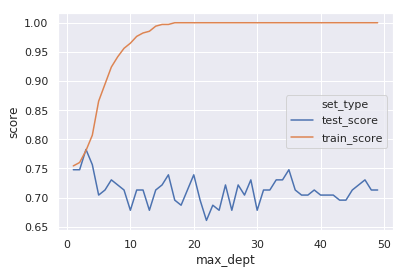

In [99]:
max_depth_values = range(1, 50)
classifier_score_data = pd.DataFrame()
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 'train_score': [train_score], 'max_dept': [max_dept]}))
classifier_score_data = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')
sns.lineplot(x="max_dept", y="score",
                   hue="set_type", data=classifier_score_data)

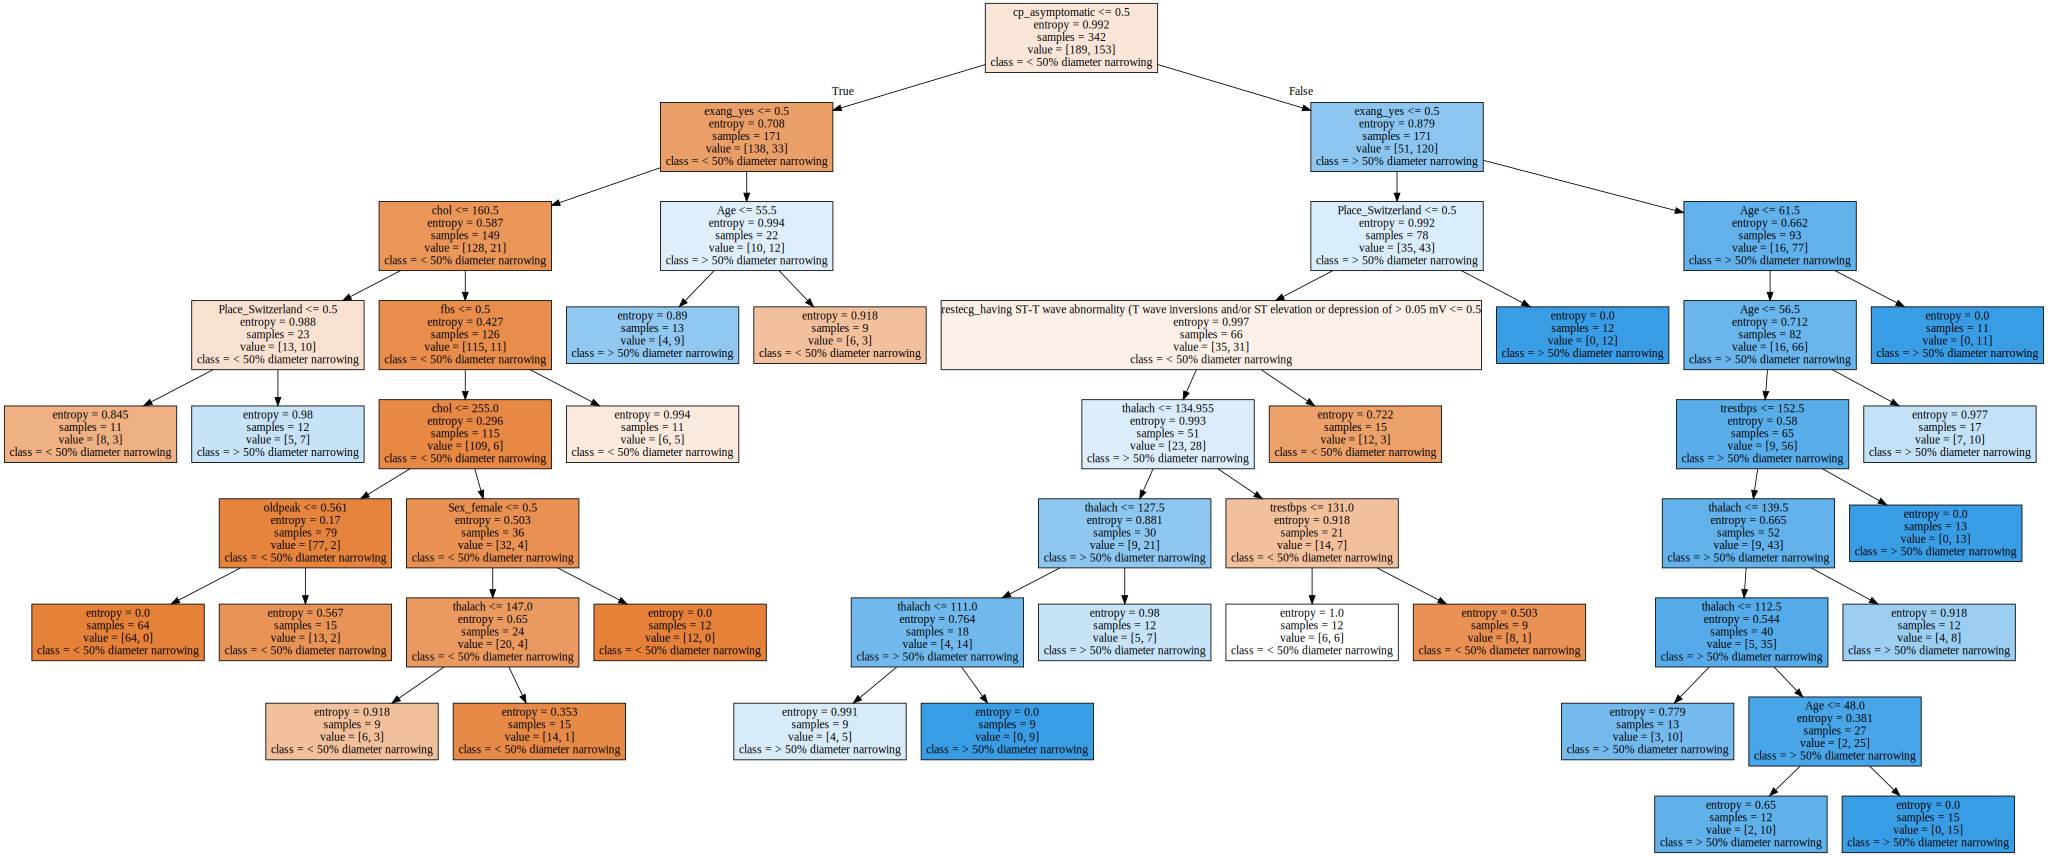

In [100]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:8% !important;height:8% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(best_tree, out_file=None
   , feature_names=list(X), class_names=['< 50% diameter narrowing', '> 50% diameter narrowing'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [101]:
y_true, y_pred = y_test, best_tree.predict(X_test)

In [102]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(classes[unique_labels(y_true, y_pred)].index)
    classes = pd.Series(classes)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

/home/maria/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


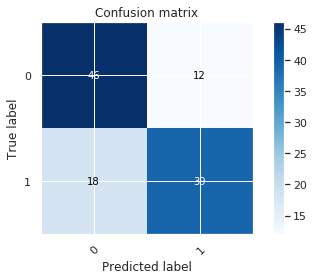

In [103]:
np.set_printoptions(precision=2)
plot_confusion_matrix(y_test, y_pred, classes=df.num)
plt.show()